In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [142]:
df=pd.read_csv('TA_restaurants_curated.csv')
df.head(5)

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170


In [143]:
df.shape

(125527, 11)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125527 entries, 0 to 125526
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         125527 non-null  int64  
 1   Name               125527 non-null  object 
 2   City               125527 non-null  object 
 3   Cuisine Style      94176 non-null   object 
 4   Ranking            115876 non-null  float64
 5   Rating             115897 non-null  float64
 6   Price Range        77672 non-null   object 
 7   Number of Reviews  108183 non-null  float64
 8   Reviews            115911 non-null  object 
 9   URL_TA             125527 non-null  object 
 10  ID_TA              125527 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 10.5+ MB


#### Statistical analysis of dataset

In [145]:
df.describe()

,Unnamed: 0,Ranking,Rating,Number of Reviews
count,125527.000000,115876.000000,115897.000000,108183.000000
mean,3974.686131,3657.463979,3.987441,125.184983
std,4057.687698,3706.255301,0.678814,310.833311
min,0.000000,1.000000,-1.000000,2.000000
25%,1042.000000,965.000000,3.500000,9.000000
50%,2445.000000,2256.000000,4.000000,32.000000
75%,5626.000000,5237.000000,4.500000,114.000000
max,18211.000000,16444.000000,5.000000,16478.000000


# Missing Values

In [146]:
df.isnull().sum()

Unnamed: 0               0
Name                     0
City                     0
Cuisine Style        31351
Ranking               9651
Rating                9630
Price Range          47855
Number of Reviews    17344
Reviews               9616
URL_TA                   0
ID_TA                    0
dtype: int64

,Total,Percent
Price Range,47855,0.381233
Cuisine Style,31351,0.249755
Number of Reviews,17344,0.138169
Ranking,9651,0.076884
Rating,9630,0.076717
Reviews,9616,0.076605
ID_TA,0,0.000000
URL_TA,0,0.000000
City,0,0.000000
Name,0,0.000000


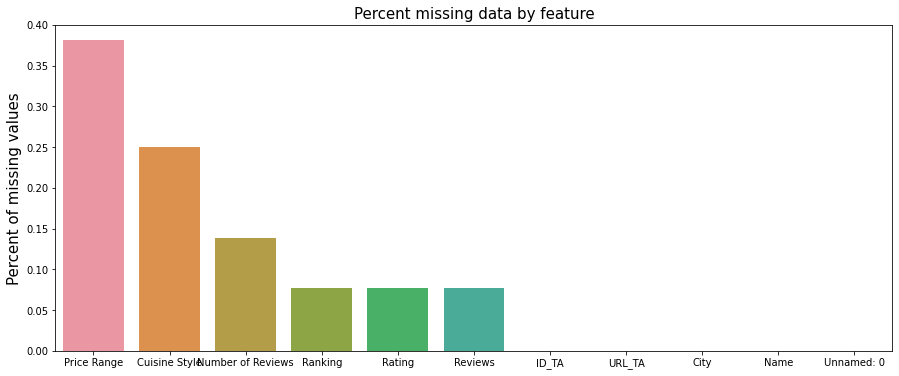

In [147]:
total = df.isnull().sum().sort_values(ascending=False)
percent = df.isnull().sum()/df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
plt.figure(figsize=(15,6))
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data

### Location of missing values

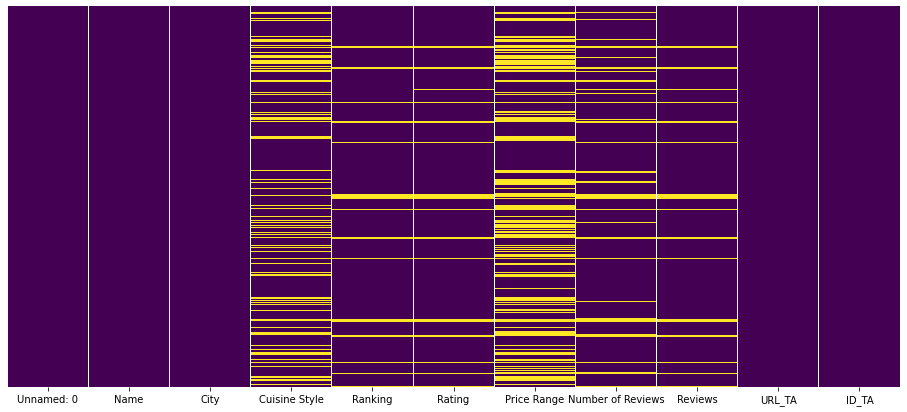

In [148]:
plt.figure(figsize=(16,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### As the 'Price Range' Column contains 38% of Missing Values so we dropped them.

In [149]:
df=df.dropna(subset=['Price Range'])

# Exploratory Data Analysis

In [150]:
df1=df.copy()

### Count of Number of Restaurants in Different City

London        12163
Paris          9580
Barcelona      5407
Madrid         4969
Rome           4701
Milan          3822
Berlin         3653
Prague         2674
Amsterdam      2567
Lisbon         2513
Vienna         2127
Brussels       2108
Munich         1751
Budapest       1740
Dublin         1500
Edinburgh      1429
Lyon           1417
Stockholm      1415
Warsaw         1358
Copenhagen     1348
Hamburg        1263
Athens         1262
Zurich         1121
Oporto         1074
Geneva          981
Krakow          898
Helsinki        789
Oslo            779
Bratislava      475
Luxembourg      447
Ljubljana       341
Name: City, dtype: int64


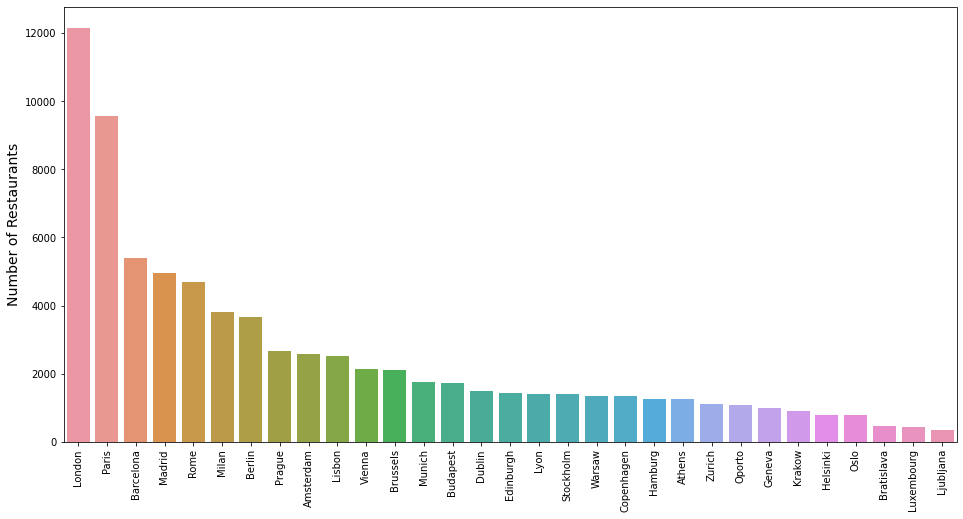

In [151]:
t=df1['City'].value_counts()
print(t)
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.ylabel('Number of Restaurants',fontsize=14)
sns.barplot(x=t.index, y=t.values, data=df)

#### Unique price range

In [152]:
df1['Price Range'].unique()

array(['$$ - $$$', '$$$$', '$'], dtype=object)

### Count of Different Rating 

 4.0    28570
 4.5    22472
 3.5    13536
 5.0     4790
 3.0     4277
 2.5     1156
 2.0      446
 1.5      107
 1.0       94
-1.0       28
Name: Rating, dtype: int64


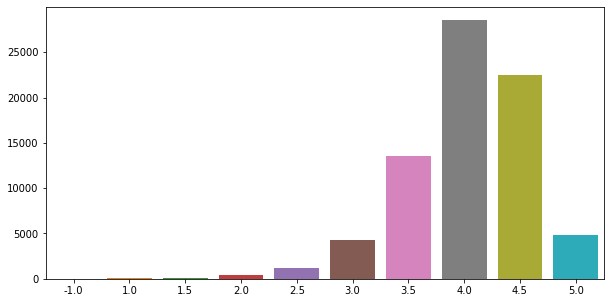

In [153]:
a=df1['Rating'].value_counts()
print(a)
plt.figure(figsize=(10,5))
sns.barplot(x=a.index, y=a.values, data=df)

#### Replacing -1 Rating with 1 Rating

In [154]:
df1['Rating'][df1['Rating']==-1]=1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Number of Reviews in Cities

City
London        2097007.0
Rome          1643980.0
Paris         1473481.0
Barcelona      986031.0
Milan          955606.0
Madrid         748069.0
Lisbon         443096.0
Prague         433470.0
Amsterdam      407534.0
Edinburgh      398062.0
Berlin         384519.0
Budapest       330368.0
Dublin         310120.0
Brussels       255942.0
Vienna         255719.0
Munich         206470.0
Lyon           201959.0
Oporto         191345.0
Copenhagen     178480.0
Athens         163282.0
Krakow         157681.0
Stockholm      151661.0
Warsaw         111128.0
Zurich         109607.0
Hamburg         98014.0
Oslo            96280.0
Geneva          85643.0
Helsinki        63099.0
Luxembourg      45177.0
Ljubljana       40933.0
Bratislava      39183.0
Name: Number of Reviews, dtype: float64


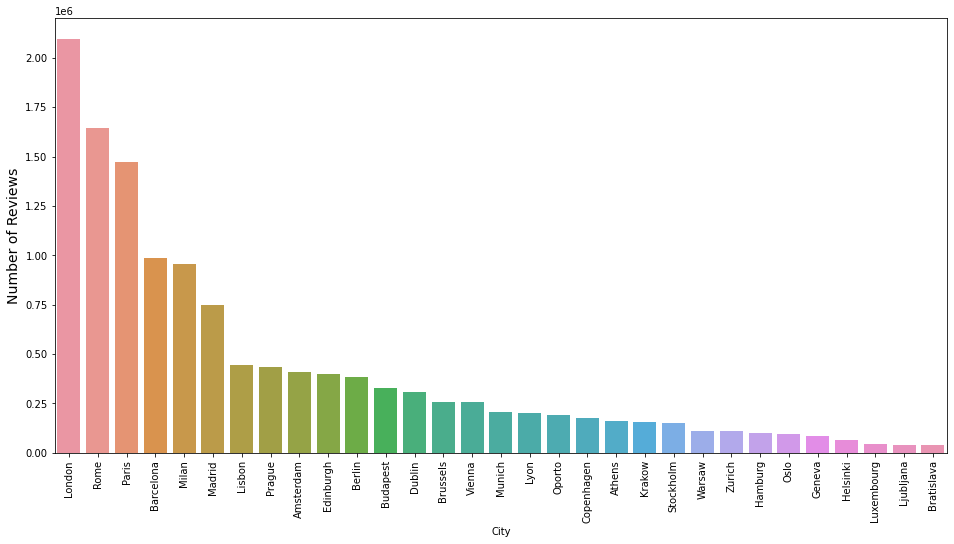

In [155]:
tr= df1.groupby('City')['Number of Reviews'].sum().sort_values(ascending=False)
print(tr)
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.ylabel('Number of Reviews',fontsize=14)
sns.barplot(x=tr.index, y=tr.values, data=df)

In [156]:
df1.head()

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170


### Dropping Unused Columns

In [157]:
df1.drop(['Unnamed: 0','Ranking','URL_TA','ID_TA','Reviews'],axis=1,inplace=True)

In [158]:
df1.head()

,Name,City,Cuisine Style,Rating,Price Range,Number of Reviews
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",5.0,$$ - $$$,136.0
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",4.5,$$$$,812.0
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",4.5,$$$$,567.0
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",5.0,$$$$,564.0
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",4.5,$$$$,316.0


### Citywise Count of Rating

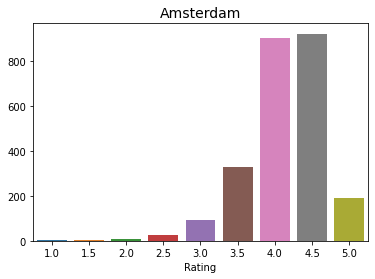

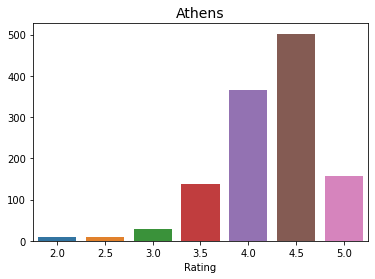

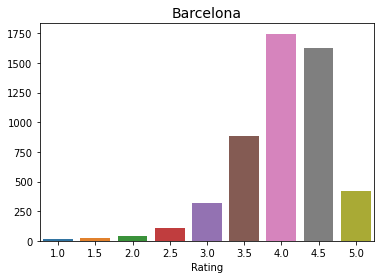

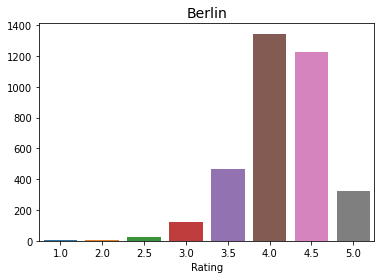

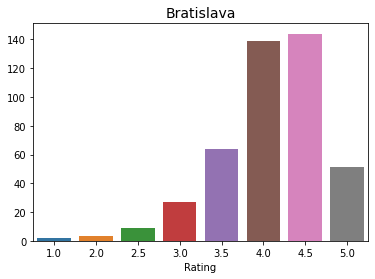

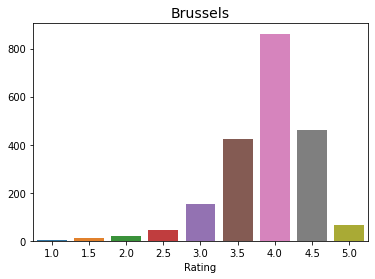

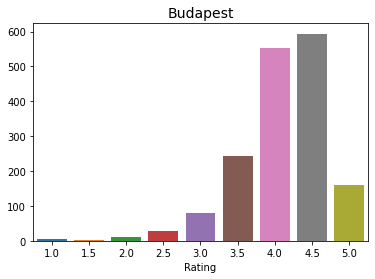

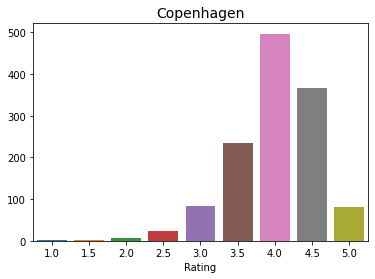

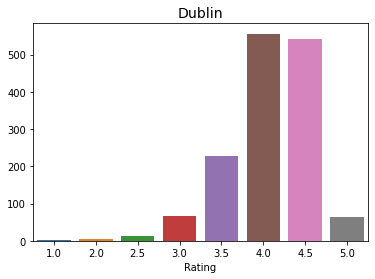

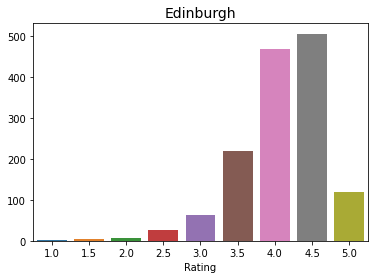

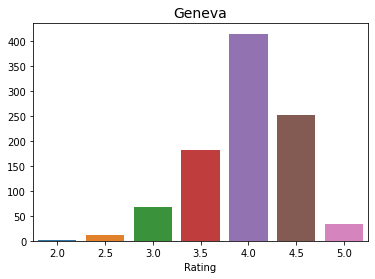

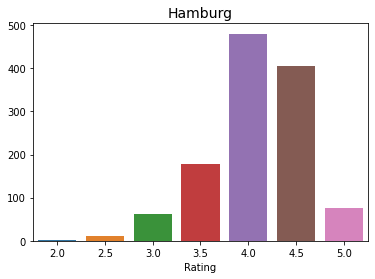

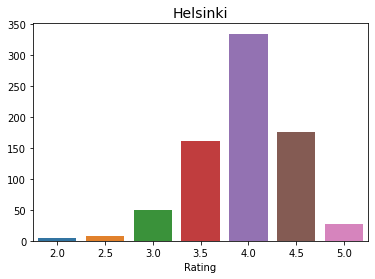

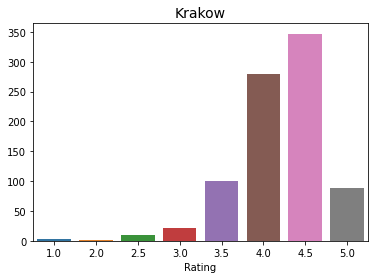

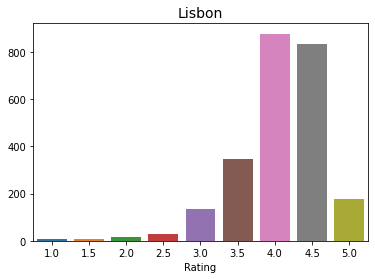

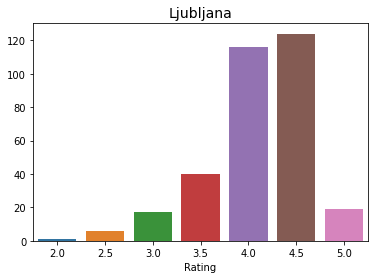

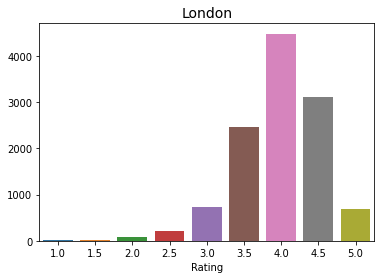

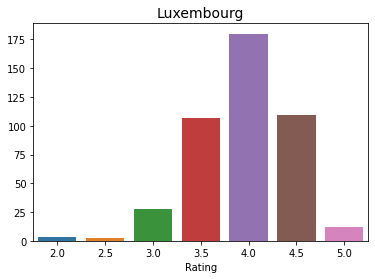

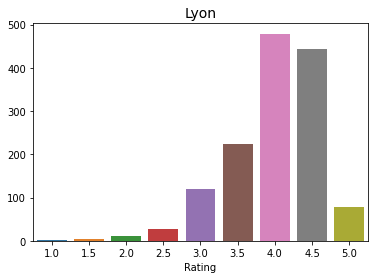

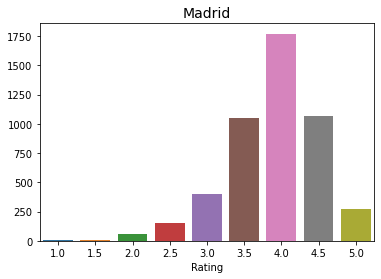

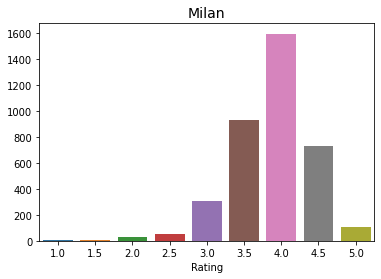

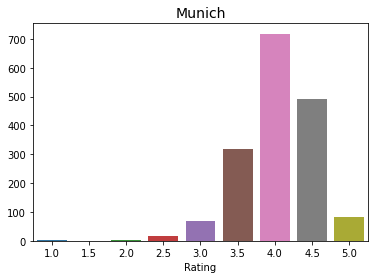

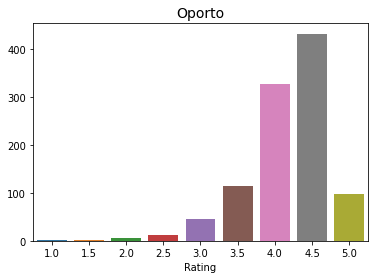

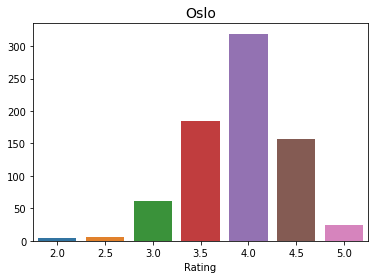

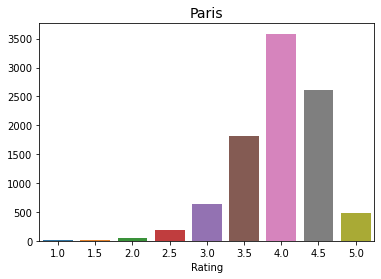

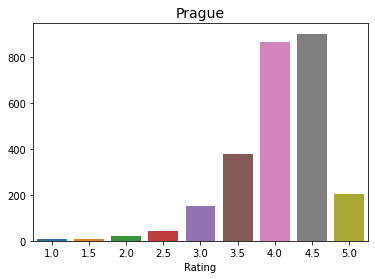

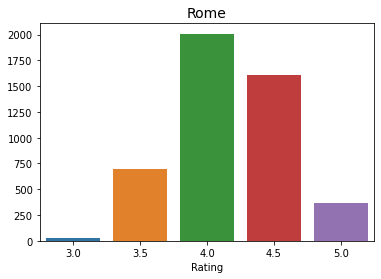

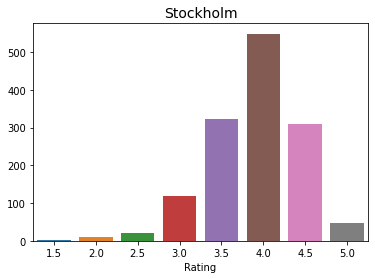

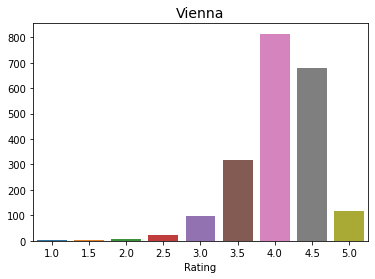

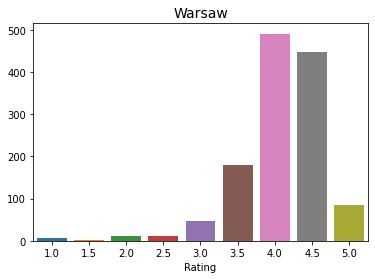

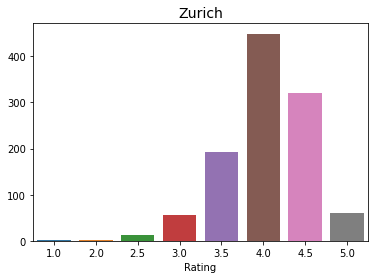

In [159]:
city=df1['City'].unique()
for c in city:
    t=df1[['City','Rating']][df1['City']==c]
    total=t.groupby('Rating')['City'].count()
    sns.barplot(x=total.index,y=total.values,data=t)
    plt.title(c,fontsize=14)
    plt.show()

#### All of the cities have majority of their restaurant ratings have greater than 4.0 star. So we fill Null Values with 4.

In [160]:
df1['Rating'].fillna(4,inplace=True)

In [161]:
df1.head()

,Name,City,Cuisine Style,Rating,Price Range,Number of Reviews
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",5.0,$$ - $$$,136.0
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",4.5,$$$$,812.0
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",4.5,$$$$,567.0
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",5.0,$$$$,564.0
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",4.5,$$$$,316.0


#### Price Range in to Different Category

In [162]:
df1['Price Range'].replace(['$', '$$ - $$$', '$$$$'], ['Cheap', 'Medium', 'Expensive'], inplace=True)

Medium       54360
Cheap        19005
Expensive     4307
Name: Price Range, dtype: int64


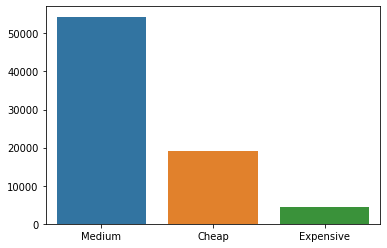

In [163]:
p=df1['Price Range'].value_counts()
print(p)
sns.barplot(x=p.index,y=p.values,data=df)

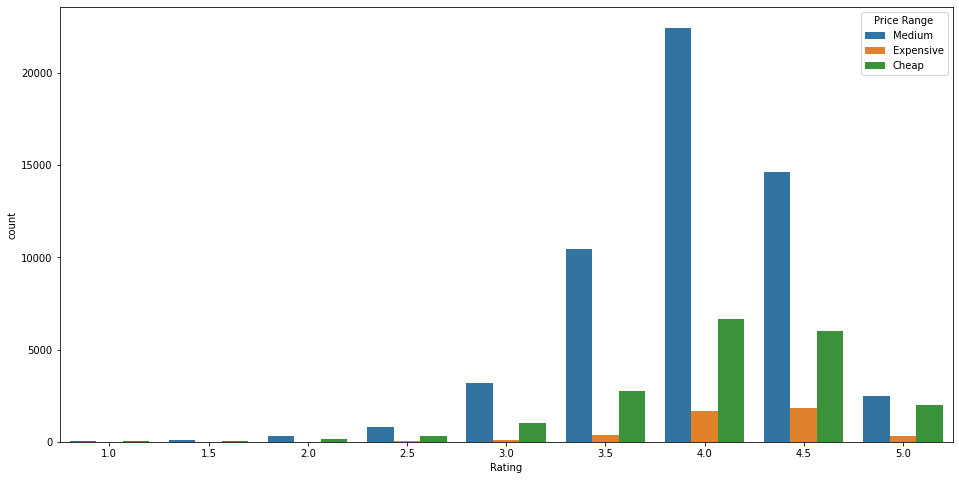

In [164]:
plt.figure(figsize=(16,8))
sns.countplot(x=df1['Rating'], data =df, hue = df1['Price Range'])

### Citywise count of  Mean Number of Reviews

City
Rome          353.240223
Edinburgh     283.519943
Milan         255.714744
Dublin        212.410959
Budapest      201.443902
Barcelona     193.986032
Krakow        190.897094
Oporto        188.703156
Lisbon        185.628823
London        180.403217
Prague        171.535417
Amsterdam     167.985985
Madrid        159.639138
Paris         158.746068
Lyon          146.772529
Copenhagen    140.204242
Athens        140.036021
Ljubljana     129.126183
Oslo          128.544726
Brussels      127.018362
Vienna        126.280988
Munich        122.972007
Berlin        111.778779
Stockholm     111.106960
Luxembourg    103.379863
Zurich        101.487963
Bratislava     91.978873
Warsaw         89.909385
Geneva         89.772537
Helsinki       83.685676
Hamburg        81.883041
Name: Number of Reviews, dtype: float64


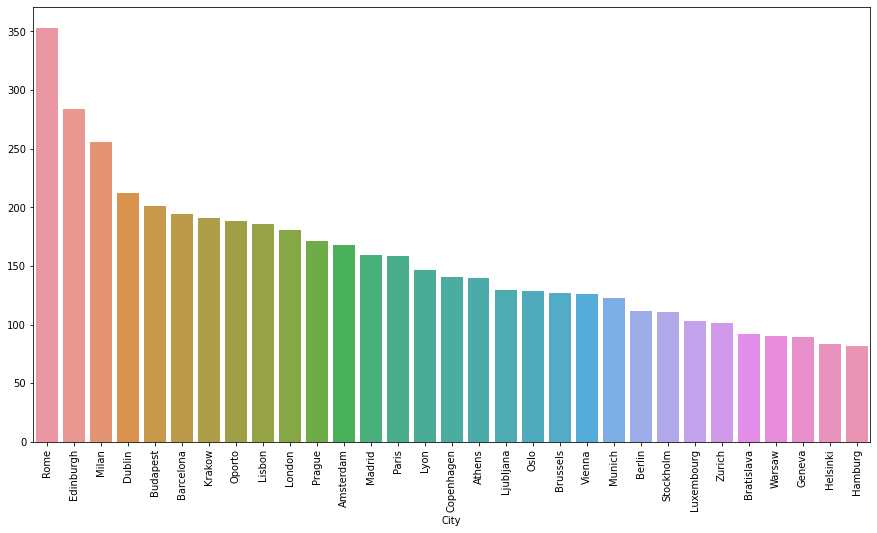

In [165]:
p=df1.groupby('City')['Number of Reviews'].mean().sort_values(ascending=False)
print(p)
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x=p.index,y=p.values,data=df1)

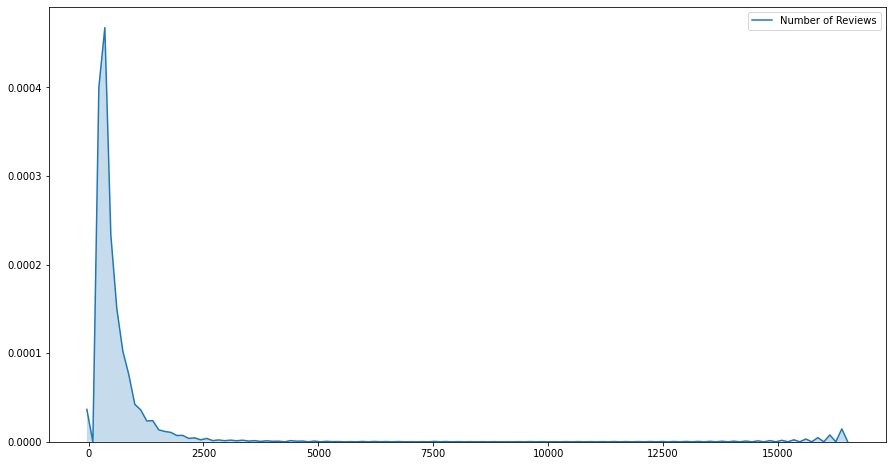

In [166]:
plt.figure(figsize=(15,8))
sns.kdeplot(df1['Number of Reviews'],shade=True)

In [167]:
for c in df1['City'].unique():
    t=df1[['City','Number of Reviews']][df1['City']==c]
    val=round(t.mean())
    df1['Number of Reviews'].fillna(val.values[0],inplace=True)

### Citywise count of Price-Range

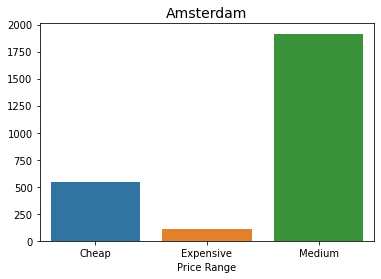

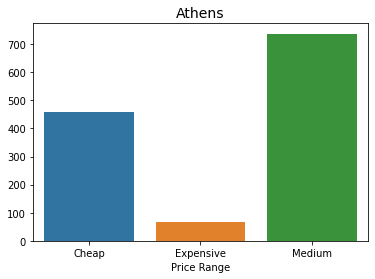

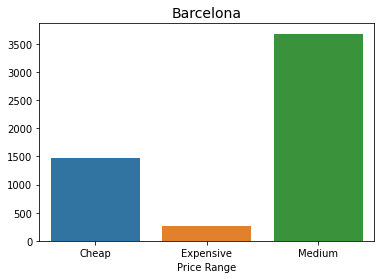

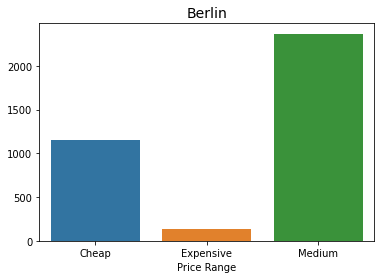

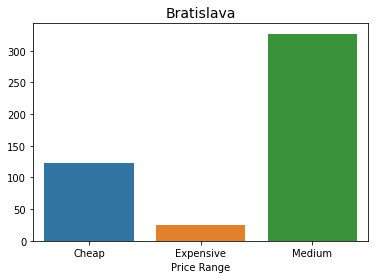

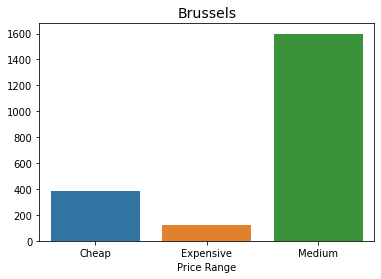

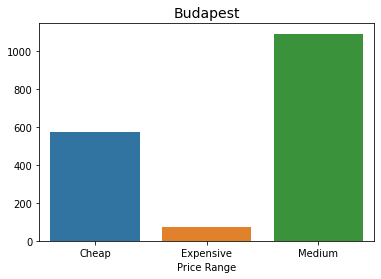

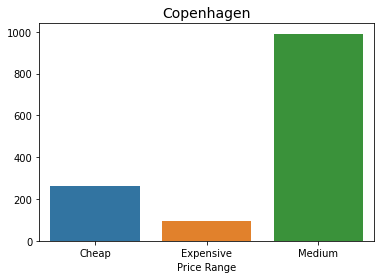

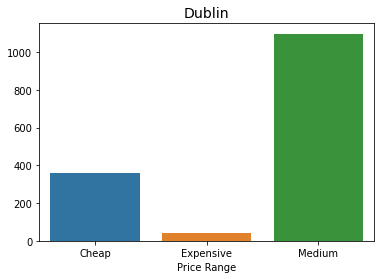

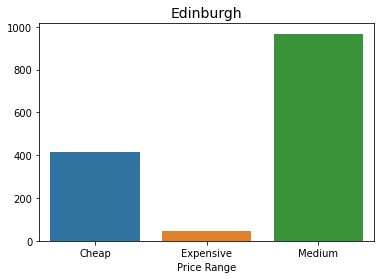

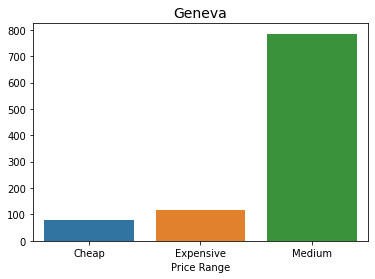

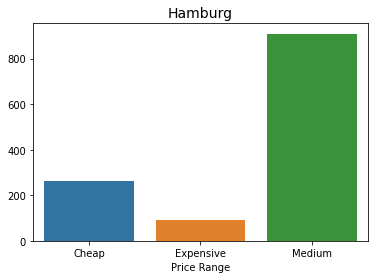

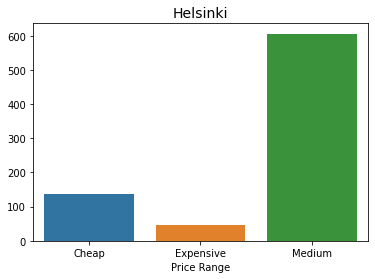

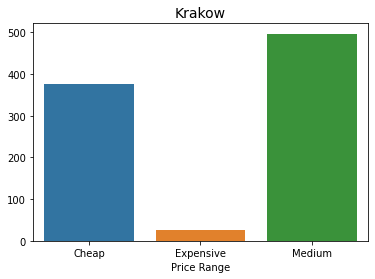

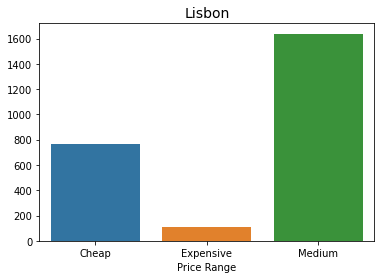

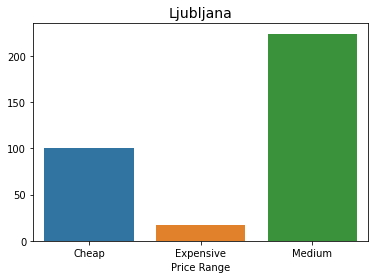

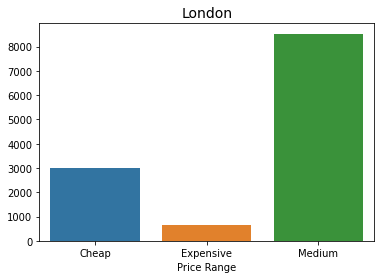

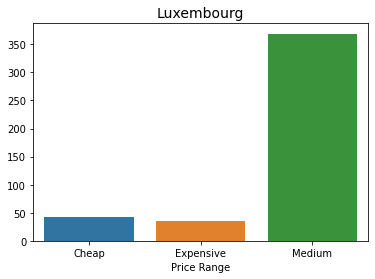

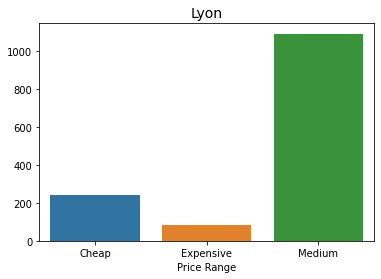

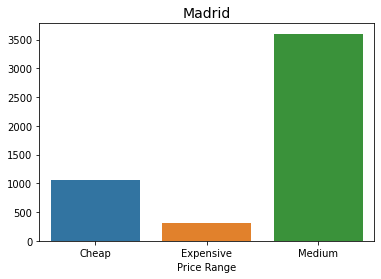

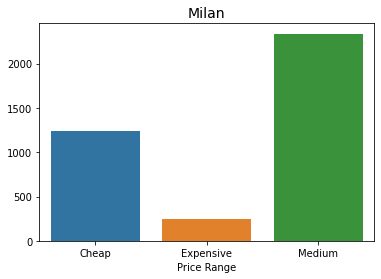

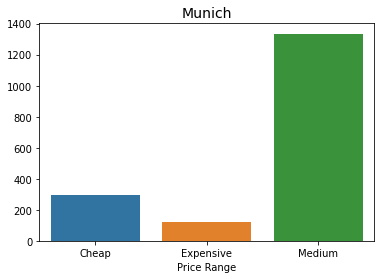

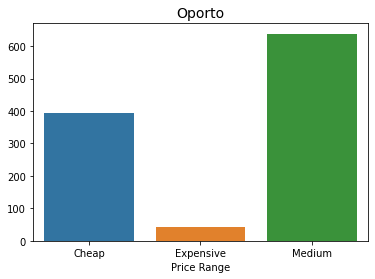

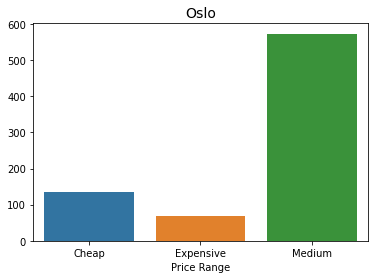

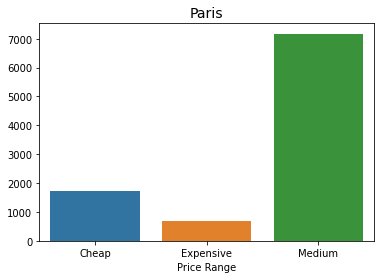

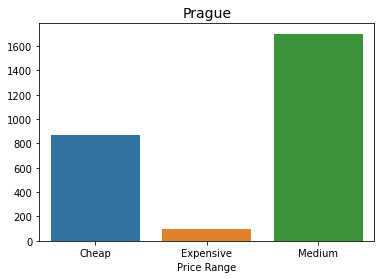

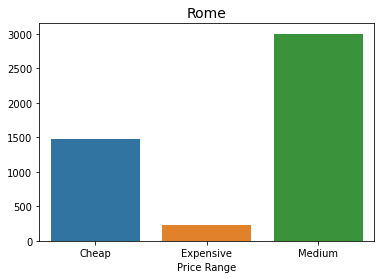

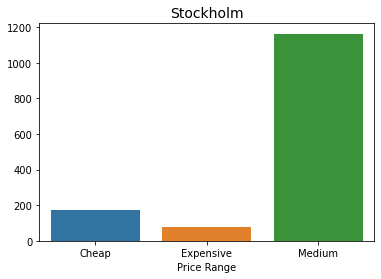

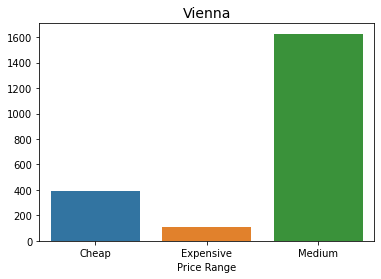

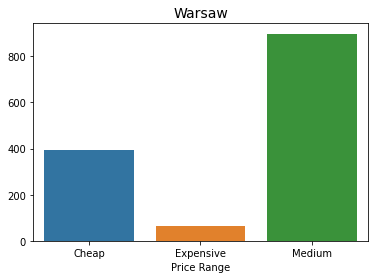

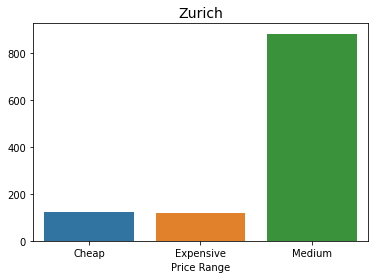

In [168]:
city=df1['City'].unique()
for c in city:
    t=df1[['City','Price Range']][df1['City']==c]
    total=t.groupby('Price Range')['City'].count()
    sns.barplot(x=total.index,y=total.values,data=t)
    plt.title(c,fontsize=14)
    plt.show()

Medium       54360
Cheap        19005
Expensive     4307
Name: Price Range, dtype: int64


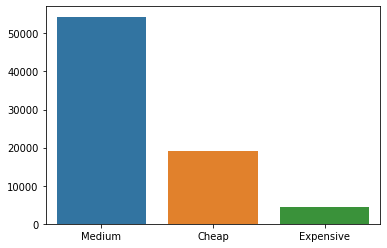

In [169]:
p=df1['Price Range'].value_counts()
print(p)
sns.barplot(x=p.index,y=p.values,data=df)

In [170]:
df1.isnull().sum()

Name                 0
City                 0
Cuisine Style        0
Rating               0
Price Range          0
Number of Reviews    0
dtype: int64

In [171]:
df1.head()

,Name,City,Cuisine Style,Rating,Price Range,Number of Reviews
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",5.0,Medium,136.0
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",4.5,Expensive,812.0
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",4.5,Expensive,567.0
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",5.0,Expensive,564.0
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",4.5,Expensive,316.0


In [172]:
df1.rename(columns={"Cuisine Style": "Cuisine_Style"},inplace=True)

### Make a new Dataframe for Cuisine Style for further Visualization

In [173]:
df1.reset_index(inplace=True)

In [174]:
df1.head()

,index,Name,City,Cuisine_Style,Rating,Price Range,Number of Reviews
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",5.0,Medium,136.0
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",4.5,Expensive,812.0
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",4.5,Expensive,567.0
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",5.0,Expensive,564.0
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",4.5,Expensive,316.0


In [175]:
cuisine=df1.loc[:,['Cuisine_Style']]
cuisine.head()

,Cuisine_Style
0,"['French', 'Dutch', 'European']"
1,"['Dutch', 'European', 'Vegetarian Friendly', '..."
2,"['Mediterranean', 'French', 'International', '..."
3,"['French', 'European', 'International', 'Conte..."
4,"['Dutch', 'European', 'International', 'Vegeta..."


In [176]:
#cuisine['Cuisine_Style'] = cuisine['Cuisine_Style'].str.replace('[', '')
#cuisine['Cuisine_Style']= cuisine['Cuisine_Style'].str.replace(']','')
cuisine['Cuisine_Style'] = cuisine['Cuisine_Style'].str.replace('\'', '')
cuisine['Cuisine_Style'] = cuisine['Cuisine_Style'].str.replace(' ' , '') 
cuisine['Cuisine_Style'] = cuisine['Cuisine_Style'].str.replace('[', '')
cuisine['Cuisine_Style']= cuisine['Cuisine_Style'].str.replace(']','')

In [177]:
cd=[]
for i in range(0,len(cuisine)):
    d=cuisine['Cuisine_Style'][i]
    e=str(d).split(',')
    cd.append({'Cuisine_Style': e})

In [178]:
cu_data=pd.DataFrame(data=cd)

In [179]:
cu_data

,Cuisine_Style
0,"[French, Dutch, European]"
1,"[Dutch, European, VegetarianFriendly, GlutenFr..."
2,"[Mediterranean, French, International, Europea..."
3,"[French, European, International, Contemporary..."
4,"[Dutch, European, International, VegetarianFri..."
...,...
77667,"[Italian, Pizza, Mediterranean]"
77668,"[Italian, Pizza, Mediterranean, Diner]"
77669,[Italian]
77670,"[Japanese, Peruvian, Sushi, SouthAmerican]"


In [180]:
df1.drop(['Cuisine_Style'],axis=1,inplace=True)

In [181]:
df2=pd.concat([df1,cu_data],axis=1)

In [182]:
df2.head()

,index,Name,City,Rating,Price Range,Number of Reviews,Cuisine_Style
0,0,Martine of Martine's Table,Amsterdam,5.0,Medium,136.0,"[French, Dutch, European]"
1,1,De Silveren Spiegel,Amsterdam,4.5,Expensive,812.0,"[Dutch, European, VegetarianFriendly, GlutenFr..."
2,2,La Rive,Amsterdam,4.5,Expensive,567.0,"[Mediterranean, French, International, Europea..."
3,3,Vinkeles,Amsterdam,5.0,Expensive,564.0,"[French, European, International, Contemporary..."
4,4,Librije's Zusje Amsterdam,Amsterdam,4.5,Expensive,316.0,"[Dutch, European, International, VegetarianFri..."


#### Transform 'Cuisine_Style' each element of a list-like in to row

In [183]:
new_df=df2.explode('Cuisine_Style')

In [184]:
new_df.head()

,index,Name,City,Rating,Price Range,Number of Reviews,Cuisine_Style
0,0,Martine of Martine's Table,Amsterdam,5.0,Medium,136.0,French
0,0,Martine of Martine's Table,Amsterdam,5.0,Medium,136.0,Dutch
0,0,Martine of Martine's Table,Amsterdam,5.0,Medium,136.0,European
1,1,De Silveren Spiegel,Amsterdam,4.5,Expensive,812.0,Dutch
1,1,De Silveren Spiegel,Amsterdam,4.5,Expensive,812.0,European


In [185]:
new_df.reset_index(inplace=True)

In [186]:
new_df

,level_0,index,Name,City,Rating,Price Range,Number of Reviews,Cuisine_Style
0,0,0,Martine of Martine's Table,Amsterdam,5.0,Medium,136.0,French
1,0,0,Martine of Martine's Table,Amsterdam,5.0,Medium,136.0,Dutch
2,0,0,Martine of Martine's Table,Amsterdam,5.0,Medium,136.0,European
3,1,1,De Silveren Spiegel,Amsterdam,4.5,Expensive,812.0,Dutch
4,1,1,De Silveren Spiegel,Amsterdam,4.5,Expensive,812.0,European
...,...,...,...,...,...,...,...,...
259333,77670,125521,RAW by Michael Adams,Zurich,4.0,Medium,168.0,SouthAmerican
259334,77671,125526,dieci,Zurich,4.0,Medium,168.0,Italian
259335,77671,125526,dieci,Zurich,4.0,Medium,168.0,Pizza
259336,77671,125526,dieci,Zurich,4.0,Medium,168.0,Mediterranean


### Count of Unique Cuisine

In [187]:
d=new_df['Cuisine_Style'].value_counts()
print(d)

VegetarianFriendly    31995
European              27532
Mediterranean         17353
Italian               15485
VeganOptions          12873
                      ...  
Welsh                     4
Salvadoran                4
Xinjiang                  3
Latvian                   3
Fujian                    3
Name: Cuisine_Style, Length: 125, dtype: int64


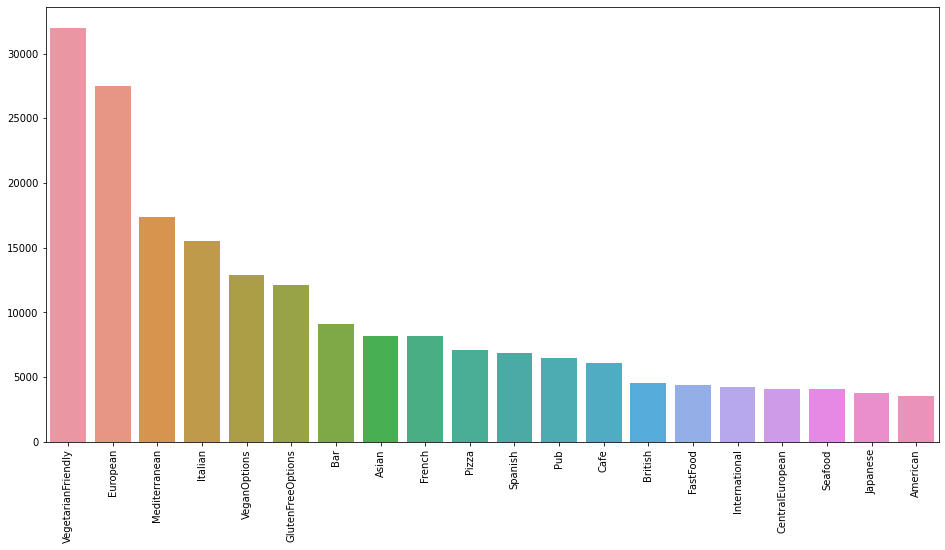

In [188]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.barplot(x=d[0:20].index,y=d[0:20].values,data=new_df)

### Citywise Count of Cuisine_Style

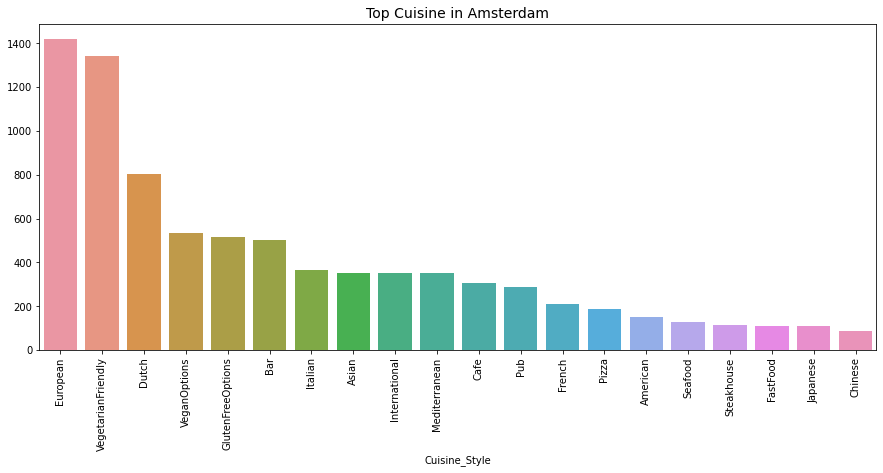

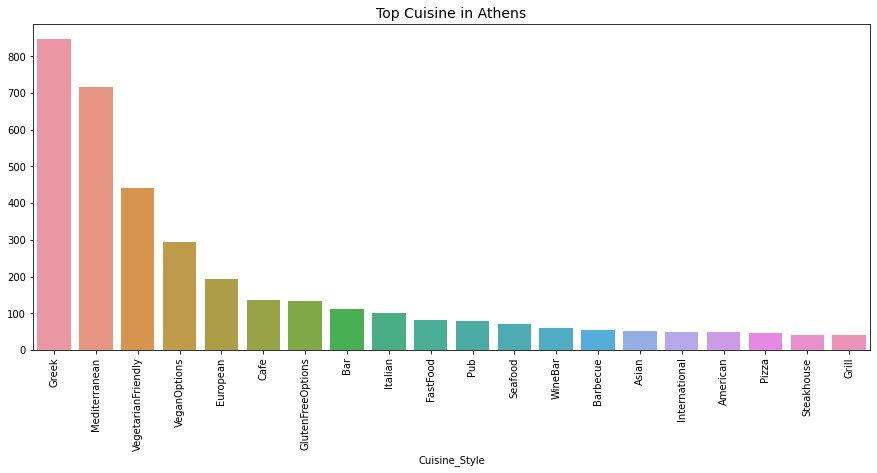

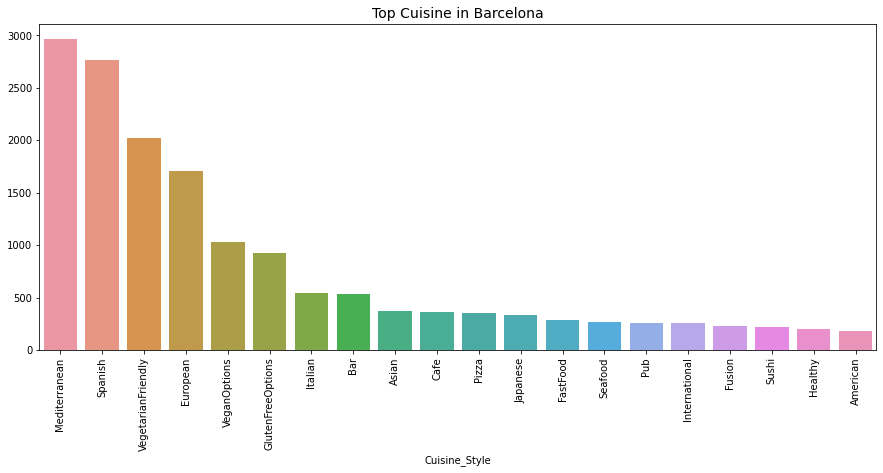

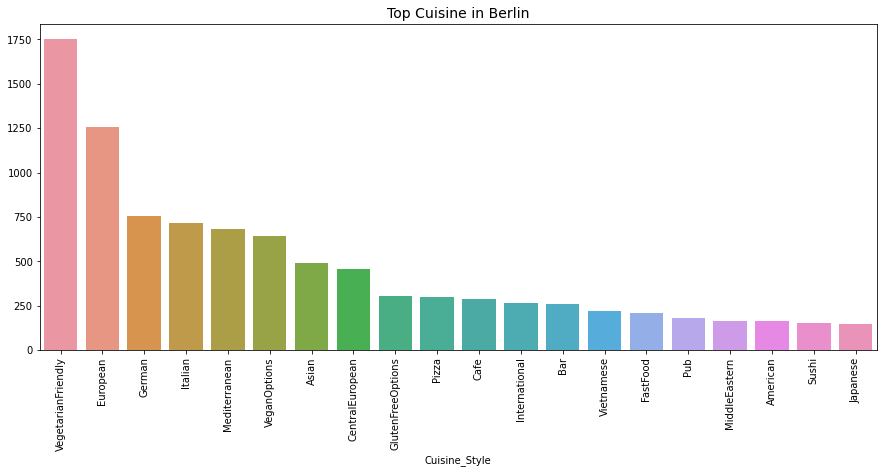

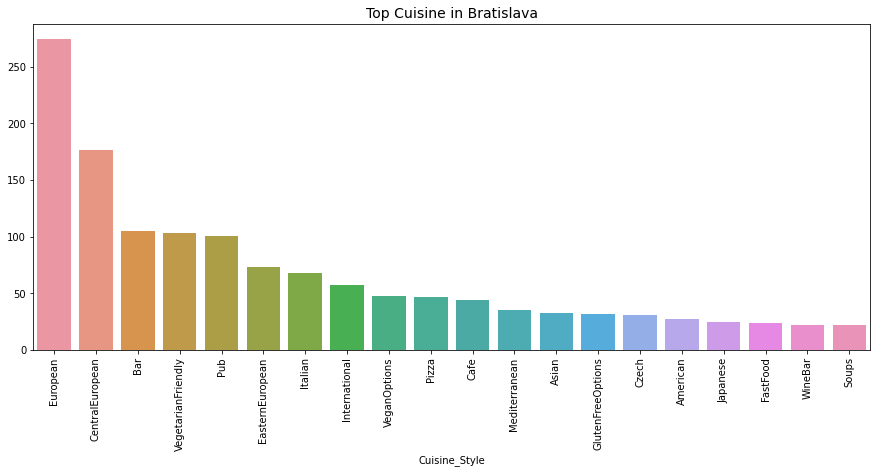

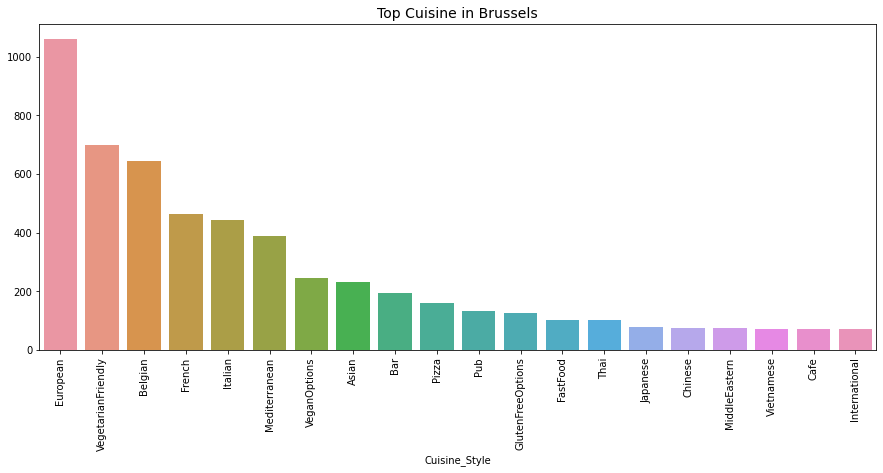

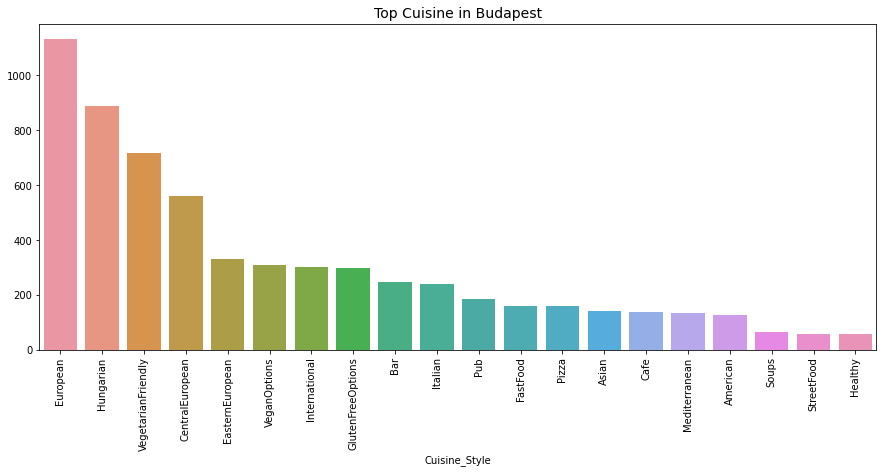

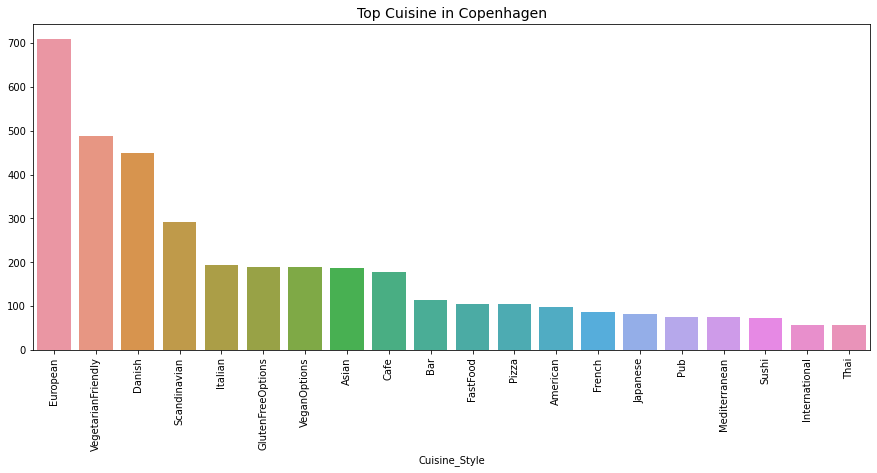

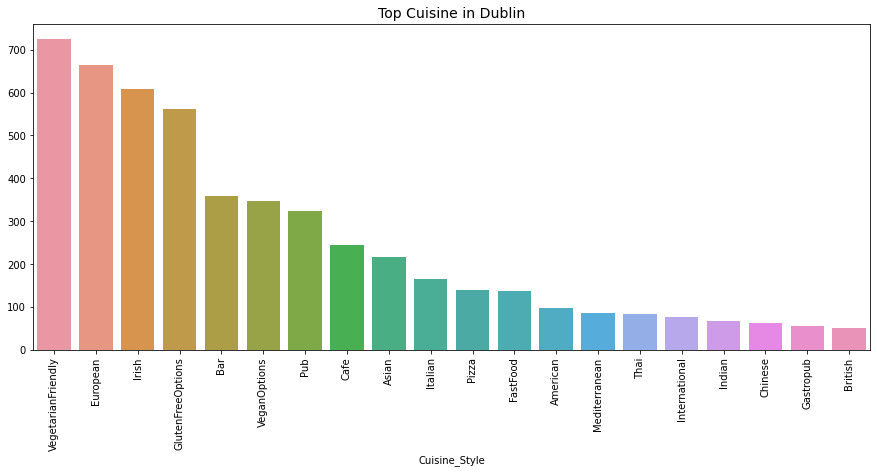

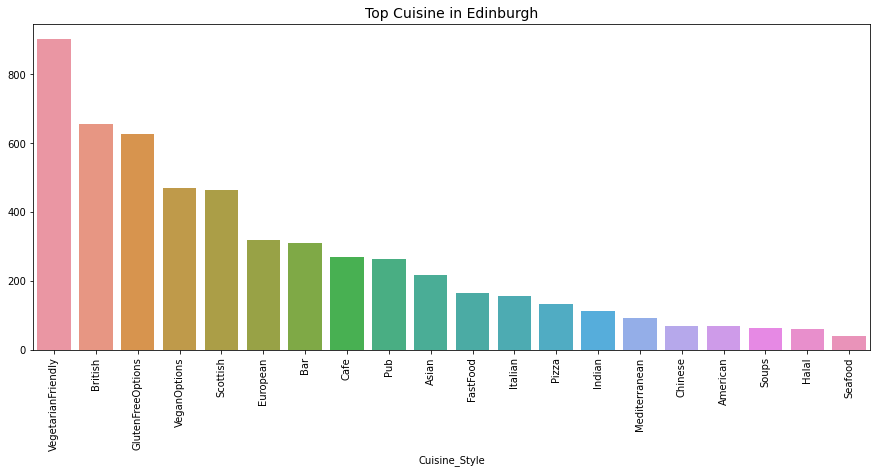

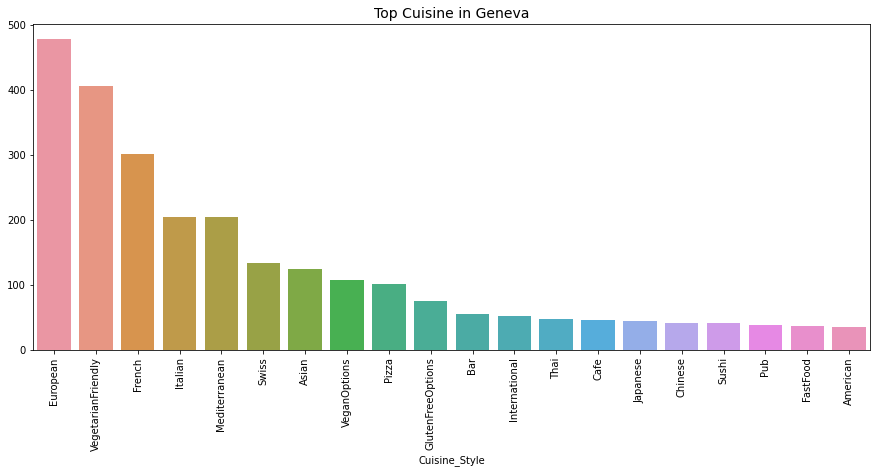

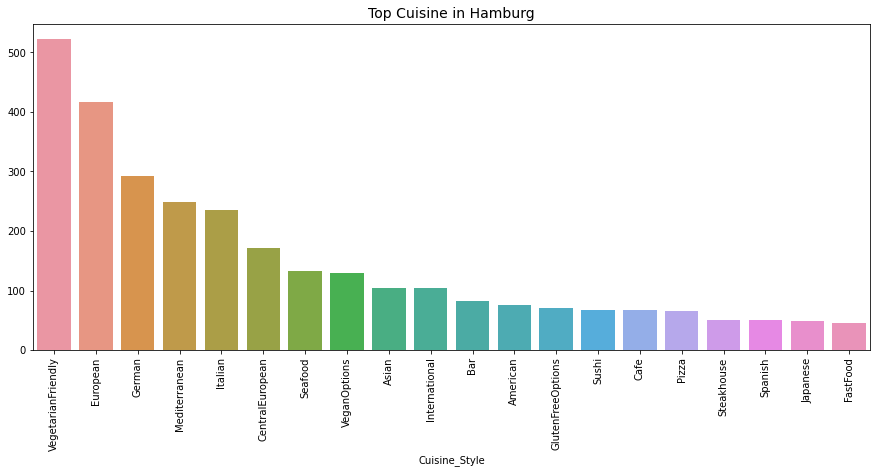

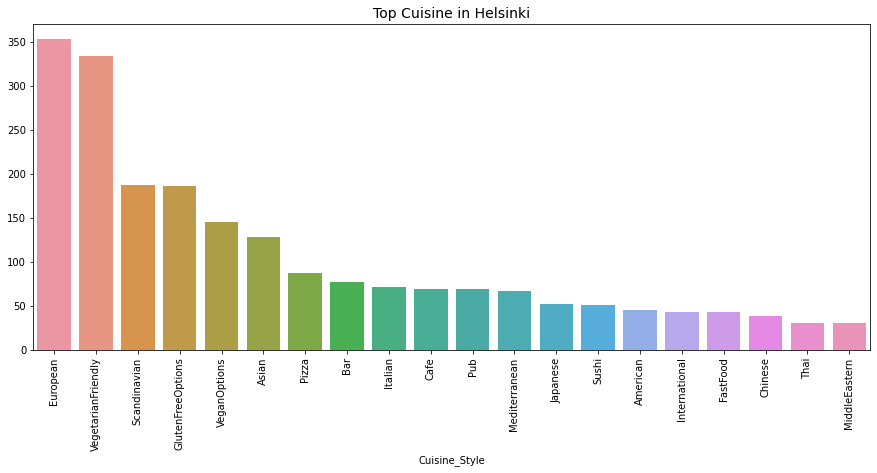

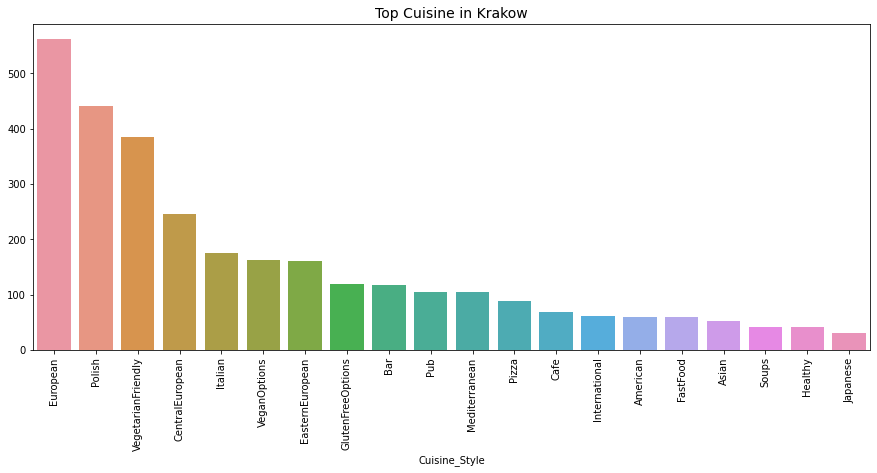

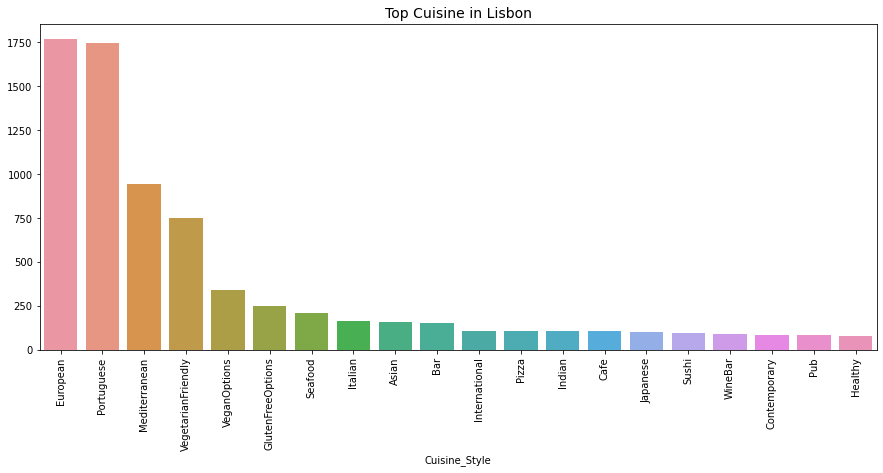

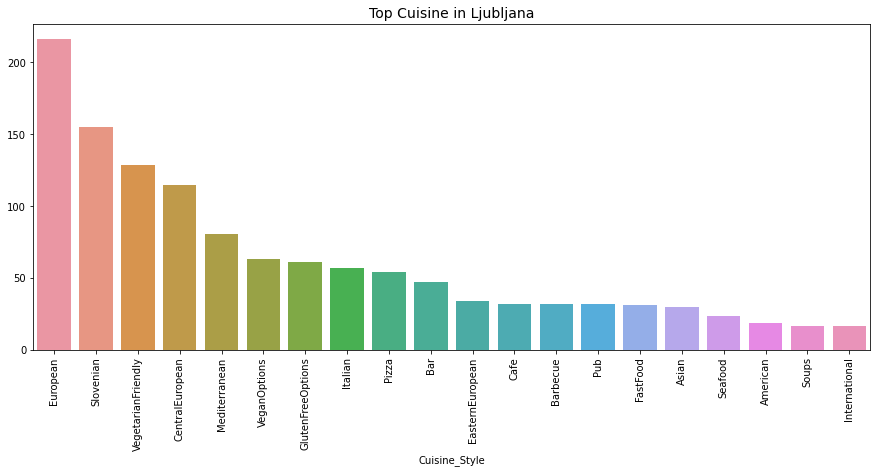

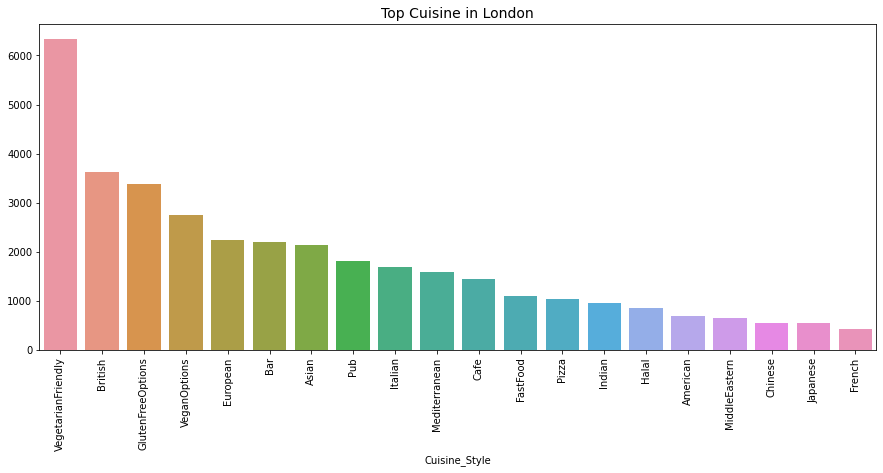

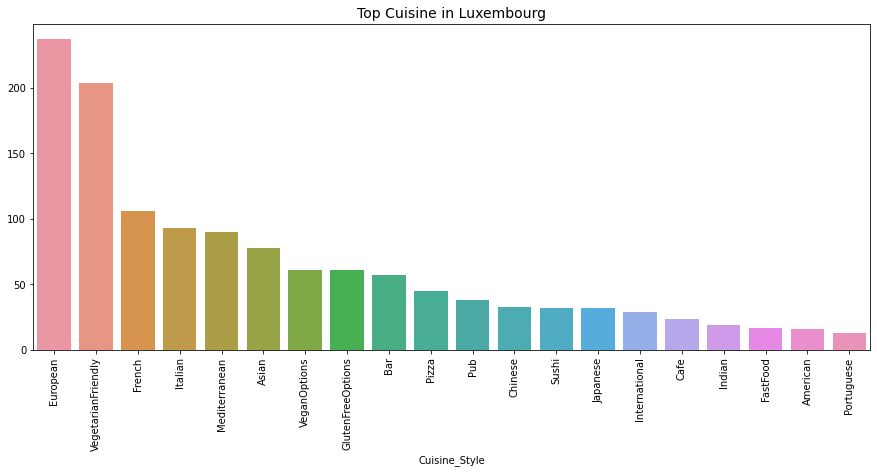

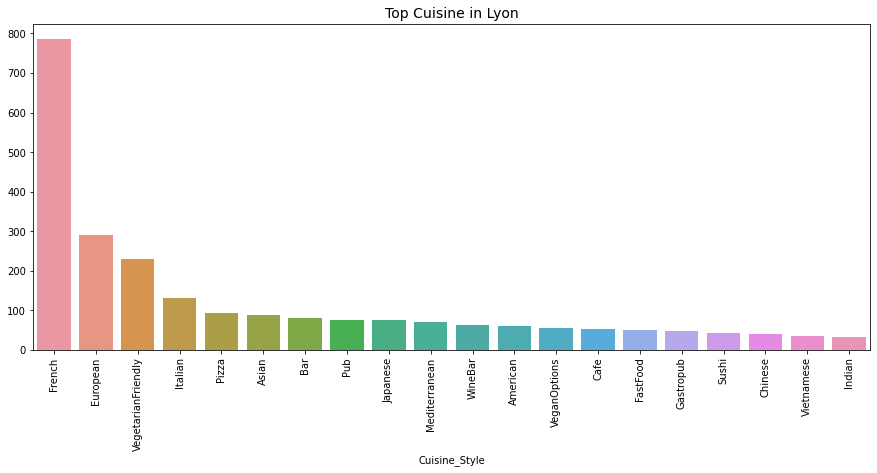

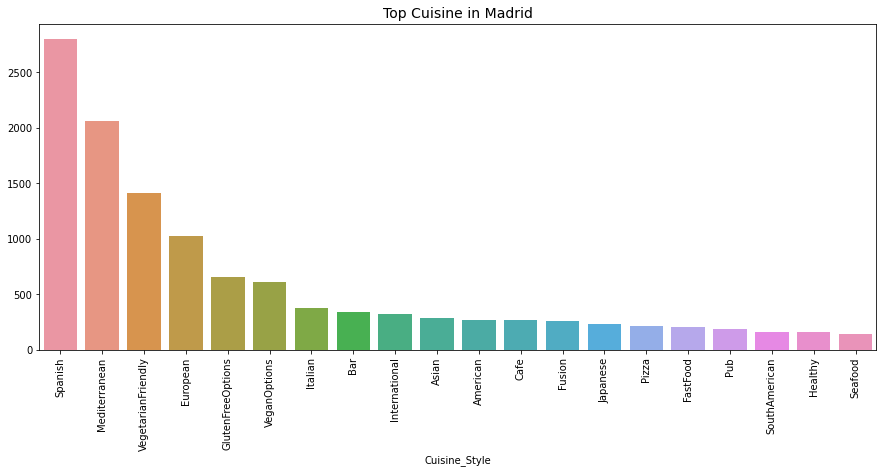

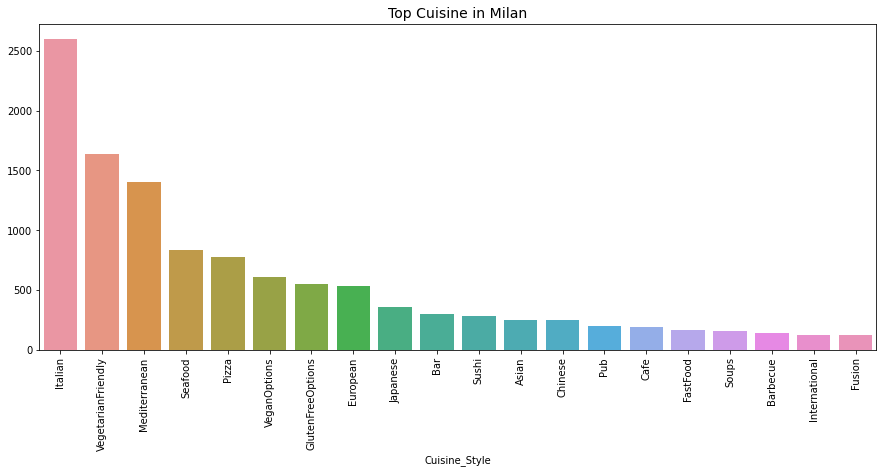

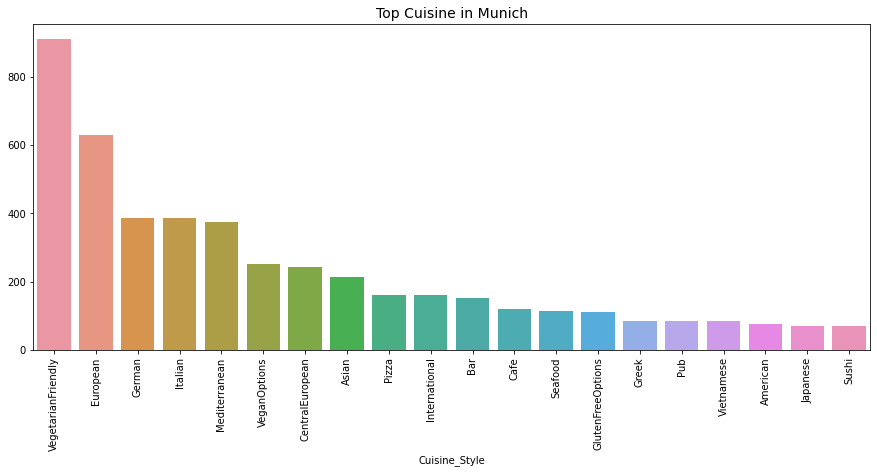

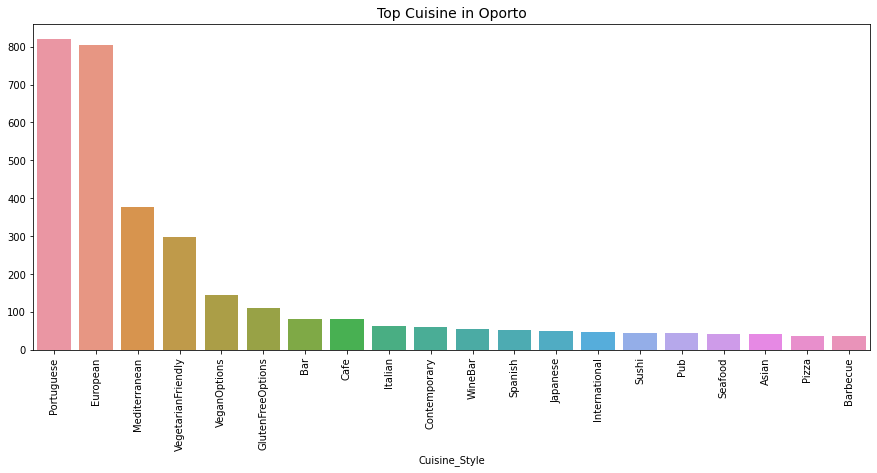

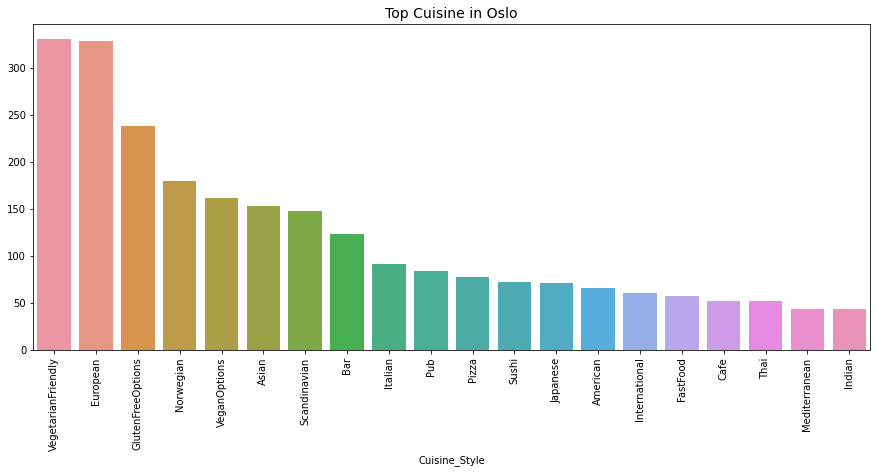

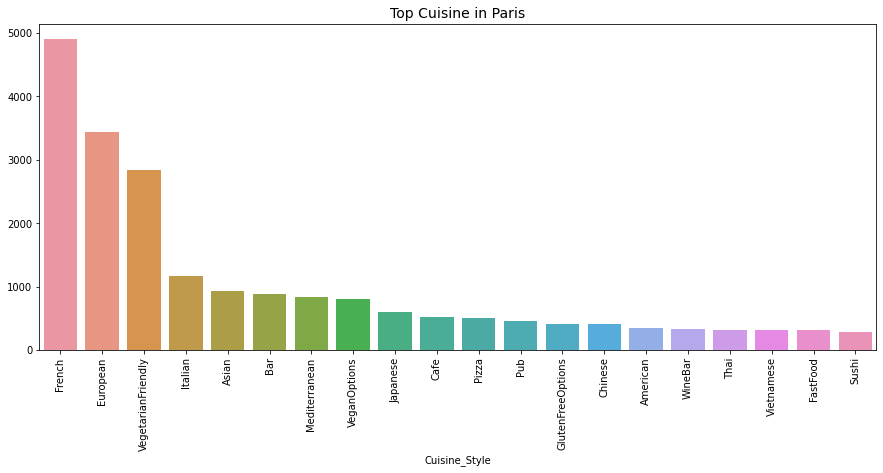

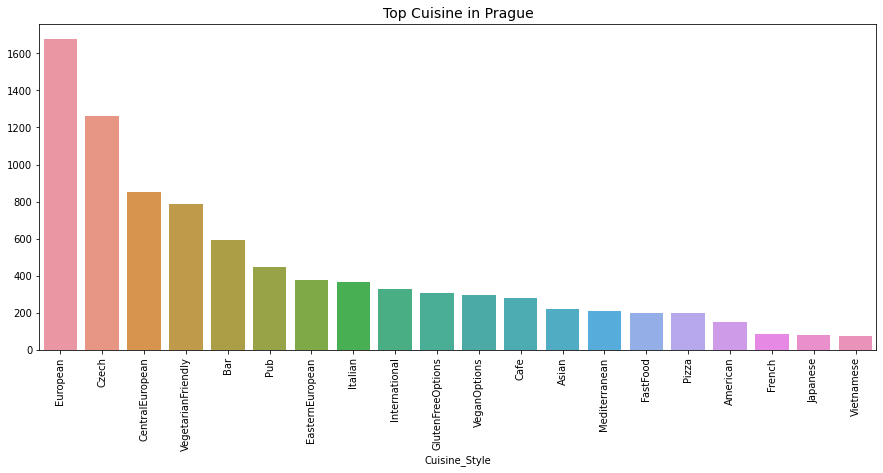

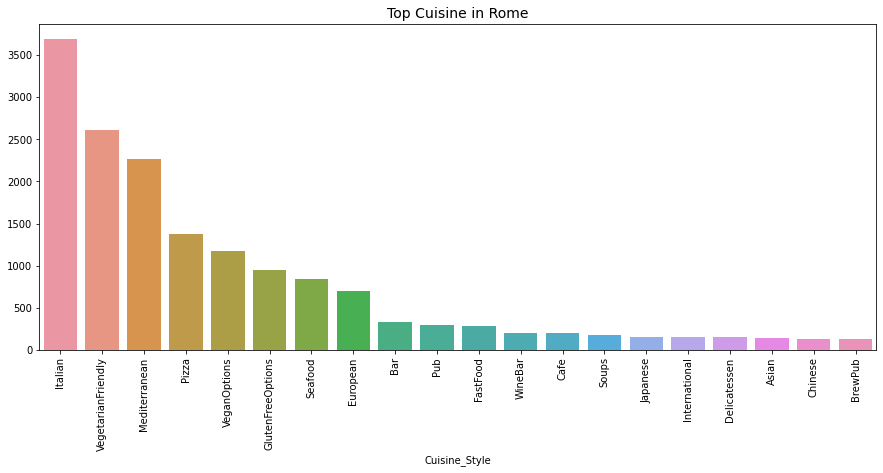

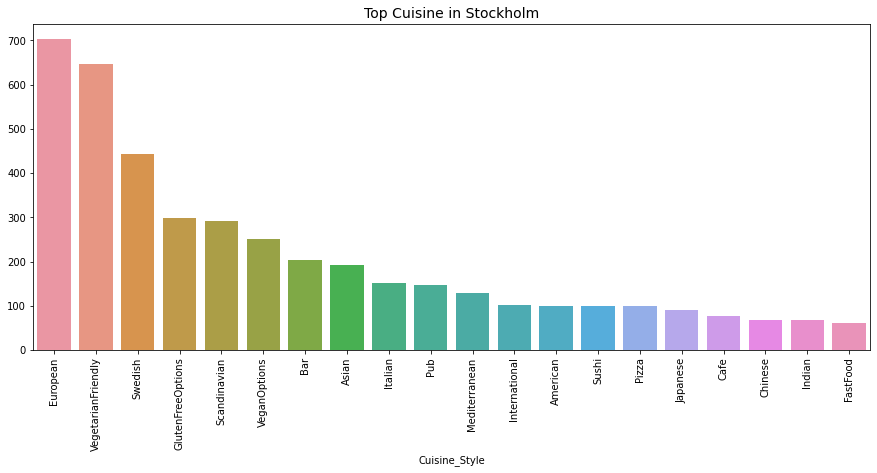

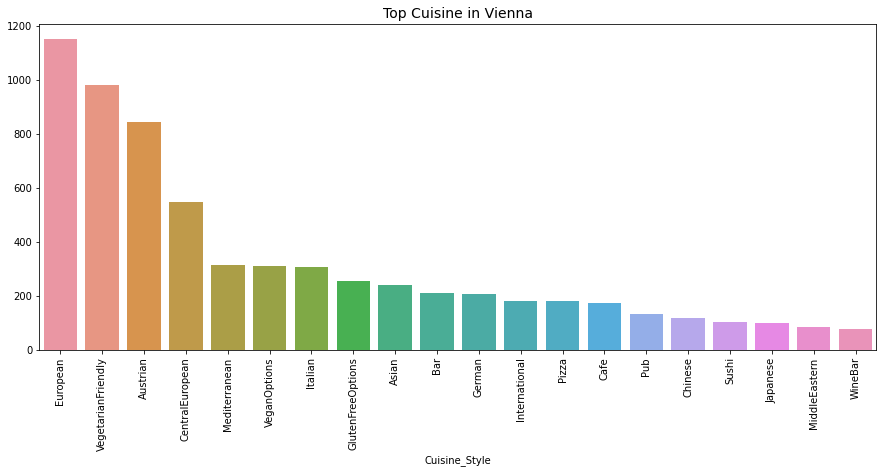

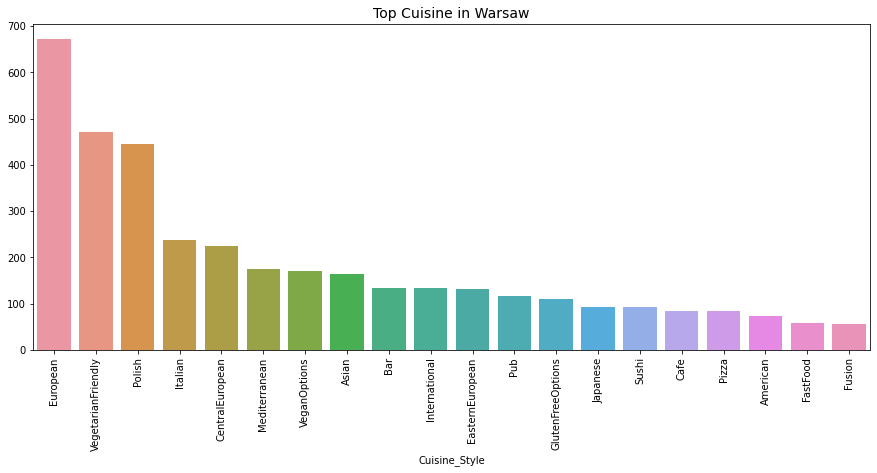

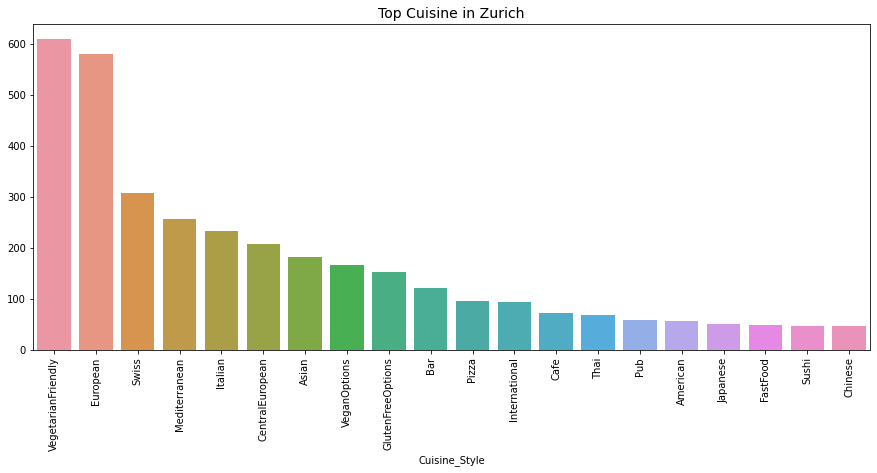

In [189]:
city=df1['City'].unique()
for c in city:
    t=new_df[['City','Cuisine_Style']][new_df['City']==c]
    total=t.groupby('Cuisine_Style')['City'].count().sort_values(ascending=False)
    plt.figure(figsize=(15,6))
    plt.xticks(rotation=90)
    sns.barplot(x=total[0:20].index,y=total[0:20].values,data=t)
    plt.title('Top Cuisine in'+" "+ str(c),fontsize=14)
    plt.show()

### Most Reviews of Cuisine 

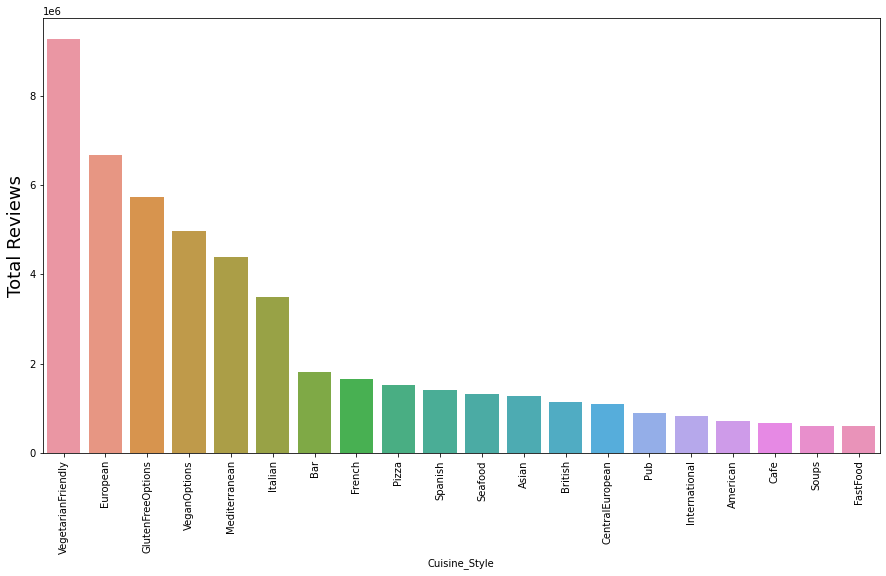

In [190]:
rev=new_df.groupby('Cuisine_Style')['Number of Reviews'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
plt.ylabel('Total Reviews',fontsize=18)
sns.barplot(x=rev[0:20].index,y=rev[0:20].values,data=new_df)

In [191]:
#new_df.drop(columns=['index','Name'],inplace=True)

In [192]:
new_df.head()

,level_0,index,Name,City,Rating,Price Range,Number of Reviews,Cuisine_Style
0,0,0,Martine of Martine's Table,Amsterdam,5.0,Medium,136.0,French
1,0,0,Martine of Martine's Table,Amsterdam,5.0,Medium,136.0,Dutch
2,0,0,Martine of Martine's Table,Amsterdam,5.0,Medium,136.0,European
3,1,1,De Silveren Spiegel,Amsterdam,4.5,Expensive,812.0,Dutch
4,1,1,De Silveren Spiegel,Amsterdam,4.5,Expensive,812.0,European


In [193]:
Y=new_df[['Rating']]
X=new_df[['City','Price Range','Number of Reviews','Cuisine_Style']]

In [194]:
X.head()

,City,Price Range,Number of Reviews,Cuisine_Style
0,Amsterdam,Medium,136.0,French
1,Amsterdam,Medium,136.0,Dutch
2,Amsterdam,Medium,136.0,European
3,Amsterdam,Expensive,812.0,Dutch
4,Amsterdam,Expensive,812.0,European


### Converting Target Variable in to different Category

In [195]:
x=Y['Rating'].unique()
x=sorted(x)
x

[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [196]:
for i in range(0,len(x)):
    Y['Rating'][Y['Rating']==x[i]]=str(x[i])+' '+'STAR'

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [197]:
Y.head()

,Rating
0,5.0 STAR
1,5.0 STAR
2,5.0 STAR
3,4.5 STAR
4,4.5 STAR


In [198]:
from sklearn.preprocessing import LabelEncoder
import pickle

### Saving label-encoding of City to disk ----- later used in the Deployment

In [115]:
a = LabelEncoder() 
dict_all = dict(zip([], []))
temp_keys = X['City'].values
temp_values = a.fit_transform(X['City'])
dict_temp = dict(zip(temp_keys, temp_values))
dict_all['City'] = dict_temp
import pickle
filehandler = open("city.obj","wb")
pickle.dump(dict_all,filehandler)
filehandler.close()

### Saving label-encoding of Price Range to disk ----- later used in the Deployment

In [116]:
b = LabelEncoder() 
dict_all = dict(zip([], []))
temp_keys = X['Price Range'].values
temp_values = b.fit_transform(X['Price Range'])
dict_temp = dict(zip(temp_keys, temp_values))
dict_all['Price'] = dict_temp
import pickle
filehandler = open("price.obj","wb")
pickle.dump(dict_all,filehandler)
filehandler.close()

### Saving label-encoding of Cuisine to disk ----- later used in the Deployment

In [117]:
c = LabelEncoder() 
dict_all = dict(zip([], []))
temp_keys = X['Cuisine_Style'].values
temp_values = c.fit_transform(X['Cuisine_Style'])
dict_temp = dict(zip(temp_keys, temp_values))
dict_all['Cuisine_Style'] = dict_temp
import pickle
filehandler = open("cuisine.obj","wb")
pickle.dump(dict_all,filehandler)
filehandler.close()

In [128]:
file = open("city.obj",'rb')
city = pickle.load(file)
file.close()
print(city)

{'City': {'Amsterdam': 0, 'Athens': 1, 'Barcelona': 2, 'Berlin': 3, 'Bratislava': 4, 'Brussels': 5, 'Budapest': 6, 'Copenhagen': 7, 'Dublin': 8, 'Edinburgh': 9, 'Geneva': 10, 'Hamburg': 11, 'Helsinki': 12, 'Krakow': 13, 'Lisbon': 14, 'Ljubljana': 15, 'London': 16, 'Luxembourg': 17, 'Lyon': 18, 'Madrid': 19, 'Milan': 20, 'Munich': 21, 'Oporto': 22, 'Oslo': 23, 'Paris': 24, 'Prague': 25, 'Rome': 26, 'Stockholm': 27, 'Vienna': 28, 'Warsaw': 29, 'Zurich': 30}}


In [129]:
file = open("price.obj",'rb')
price = pickle.load(file)
file.close()
print(price)

{'Price': {'Medium': 2, 'Expensive': 1, 'Cheap': 0}}


In [138]:
price={'Price': {'Medium': 2, 'Expensive': 1, 'Cheap': 0}}
print(price['Price']['Medium'])

2


In [130]:
file = open("cuisine.obj",'rb')
cuisine = pickle.load(file)
file.close()
print(cuisine )

{'Cuisine_Style': {'French': 47, 'Dutch': 39, 'European': 44, 'VegetarianFriendly': 118, 'GlutenFreeOptions': 53, 'Mediterranean': 74, 'International': 62, 'VeganOptions': 117, 'Contemporary': 32, 'Asian': 7, 'Indonesian': 61, 'Japanese': 67, 'Seafood': 97, 'FastFood': 45, 'American': 3, 'Bar': 13, 'CentralEuropean': 28, 'Pub': 91, 'Cafe': 20, 'British': 18, 'Healthy': 58, 'Indian': 60, 'Tibetan': 112, 'Nepali': 81, 'Italian': 65, 'Barbecue': 14, 'Steakhouse': 105, 'Latin': 70, 'Argentinean': 5, 'SouthAmerican': 101, 'Grill': 55, 'Delicatessen': 37, 'Pizza': 87, 'Thai': 111, 'Soups': 100, 'StreetFood': 106, 'Diner': 38, 'Lebanese': 72, 'MiddleEastern': 76, 'Israeli': 64, 'NewZealand': 82, 'Chinese': 30, 'Belgian': 15, 'Sushi': 107, 'Spanish': 103, 'Korean': 68, 'Turkish': 114, 'Vietnamese': 120, 'Irish': 63, 'German': 52, 'Halal': 56, 'Gastropub': 50, 'Swiss': 109, 'Scandinavian': 95, 'Fusion': 49, 'Arabic': 4, 'Balti': 11, 'Moroccan': 79, 'Tunisian': 113, 'Persian': 85, 'WineBar': 122

In [199]:
from sklearn.preprocessing import LabelEncoder
T = LabelEncoder() 
Y['Rating'] = T.fit_transform(Y['Rating'])
X['City'] = T.fit_transform(X['City'])
X['Price Range'] = T.fit_transform(X['Price Range'])
X['Cuisine_Style'] = T.fit_transform(X['Cuisine_Style'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [202]:
X['Number of Reviews']=X['Number of Reviews'].astype(int)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [233]:
X.head()

,City,Price Range,Number of Reviews,Cuisine_Style
0,0,2,136,47
1,0,2,136,39
2,0,2,136,44
3,0,1,812,39
4,0,1,812,44


In [234]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259338 entries, 0 to 259337
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   City               259338 non-null  int64
 1   Price Range        259338 non-null  int64
 2   Number of Reviews  259338 non-null  int64
 3   Cuisine_Style      259338 non-null  int64
dtypes: int64(4)
memory usage: 7.9 MB


**Target Variable Encoded as:**

5.0 STAR-------8

4.5 STAR-------7

4.0 STAR-------6

3.5 STAR-------5

3.0 STAR-------4

2.5 STAR-------3

2.0 STAR-------2

1.5 STAR-------1

1.0 STAR-------0

In [235]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259338 entries, 0 to 259337
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   City               259338 non-null  int64
 1   Price Range        259338 non-null  int64
 2   Number of Reviews  259338 non-null  int64
 3   Cuisine_Style      259338 non-null  int64
dtypes: int64(4)
memory usage: 7.9 MB


In [236]:
Y.head()

,Rating
0,8
1,8
2,8
3,7
4,7


## Model Creation

6    104657
7     83315
5     42153
8     14295
4     11109
3      2430
2       887
0       284
1       208
Name: Rating, dtype: int64


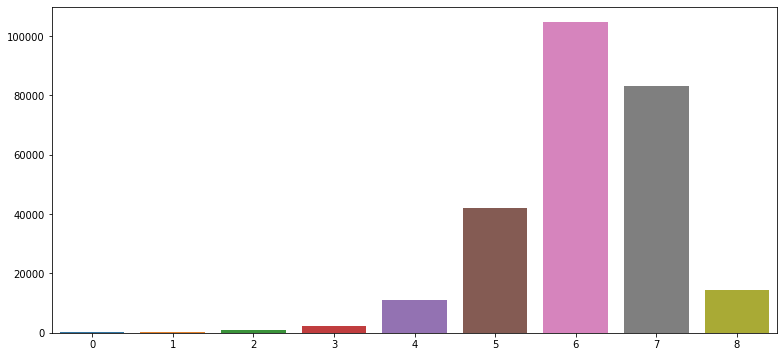

In [270]:
a=Y['Rating'].value_counts()
print(a)
plt.figure(figsize=(13,6))
sns.barplot(x=a.index,y=a.values,data=Y)

### This dataset presents Rating of Restaurant where majority of record belong to Category 6.The dataset is highly Unbalanced

### Let's see what happens when we building the model using this unbalanced dataset

In [237]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 33)

In [238]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini', splitter='best', 
                             max_depth=40, random_state=10)
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=40, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [239]:
Y_pred=model.predict(X_test)
from sklearn import metrics
print("Accuracy = {0:.3f}".format(metrics.accuracy_score(Y_test, Y_pred)))

Accuracy = 0.455


In [240]:
from sklearn.metrics import confusion_matrix,classification_report
print("Decision Tree Classifier report \n", classification_report(Y_test, Y_pred))

Decision Tree Classifier report 
               precision    recall  f1-score   support

           0       0.05      0.05      0.05        75
           1       0.03      0.04      0.03        56
           2       0.07      0.08      0.07       268
           3       0.08      0.10      0.09       736
           4       0.16      0.17      0.16      3464
           5       0.31      0.35      0.33     12507
           6       0.54      0.56      0.55     31680
           7       0.51      0.46      0.49     24758
           8       0.33      0.23      0.27      4258

    accuracy                           0.45     77802
   macro avg       0.23      0.23      0.23     77802
weighted avg       0.46      0.45      0.46     77802



#### The recall of the minority class in very less. It proves that the model is more biased towards majority class. So, it proves that this is not the best model.Now, we will apply imbalanced data handling techniques and see their accuracy and recall results.

In [223]:
#Y_pred=clf.predict(X_test)
#from sklearn import metrics
#print("Accuracy = {0:.3f}".format(metrics.accuracy_score(Y_test, Y_pred)))

In [241]:
Y_pred

array([6, 5, 6, ..., 7, 7, 5])

In [242]:
Y_pred=pd.DataFrame(Y_pred,columns=['Predicted'])
Y_pred=Y_pred.set_index(Y_test.index)

In [243]:
result= pd.concat([Y_test,Y_pred],axis=1)
result

,Rating,Predicted
2466,7,6
223794,7,5
233756,5,6
98087,5,5
235209,7,8
...,...,...
186446,7,7
163232,6,6
201712,7,7
215992,6,7


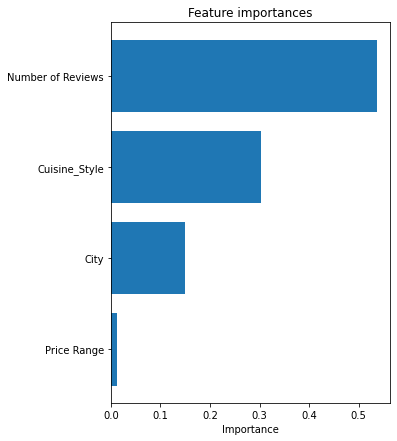

In [227]:
features_list = X.columns.values
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)[:20]
plt.figure(figsize=(5,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()

### In order to treat imbalanced dataset, we will use oversampling method (SMOTE)


In [244]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state = 0)
X_sm, Y_sm = oversampler.fit_sample(X, Y)

Using TensorFlow backend.


8    104657
7    104657
6    104657
5    104657
4    104657
3    104657
2    104657
1    104657
0    104657
Name: Rating, dtype: int64


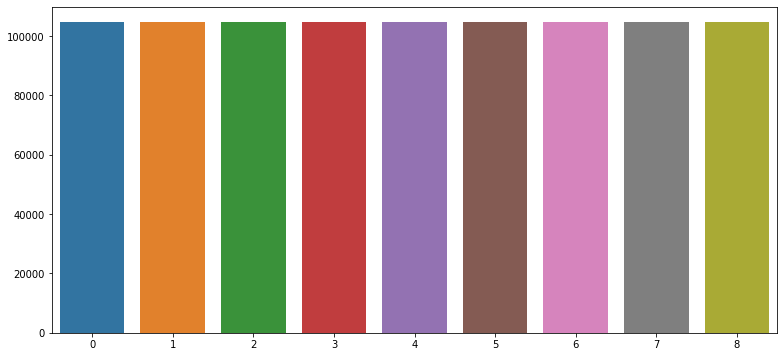

In [271]:
a=Y_sm['Rating'].value_counts()
print(a)
plt.figure(figsize=(13,6))
sns.barplot(x=a.index,y=a.values,data=Y_sm)

## Look!

### That SMOTE Algorithm has oversampled the minority instances and made it equal to majorityclass. All categories have equal amount of records. More specifically, the minority class has been increased to the total number of majority class.Now see the accuracy and recall results after applying SMOTE algorithm (Oversampling).

### Now the Dataset is Balanced

In [248]:
from sklearn.model_selection import train_test_split
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, Y_sm, test_size = 0.30, random_state=10)

In [249]:
print('Size of X_train',X_train_sm.shape)
print('Size of y_train',y_train_sm.shape)
print('Size of X_test',X_test_sm.shape)
print('Size of y_test',y_test_sm.shape)

Size of X_train (659339, 4)
Size of y_train (659339, 1)
Size of X_test (282574, 4)
Size of y_test (282574, 1)


In [250]:
from sklearn.tree import DecisionTreeClassifier
classifier_sm=DecisionTreeClassifier()
classifier_sm.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [253]:
y_pred_sm=classifier_sm.predict(X_test_sm)
from sklearn import metrics
print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test_sm, y_pred_sm)))

Accuracy = 0.692


In [254]:
from sklearn.metrics import confusion_matrix,classification_report
print("Decision Tree Classifier report \n", classification_report(y_test_sm, y_pred_sm))

Decision Tree Classifier report 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93     31494
           1       0.89      0.97      0.93     31487
           2       0.81      0.87      0.84     31334
           3       0.74      0.83      0.78     31565
           4       0.62      0.67      0.64     31418
           5       0.51      0.52      0.51     31393
           6       0.43      0.33      0.37     31308
           7       0.50      0.38      0.43     31276
           8       0.70      0.69      0.69     31299

    accuracy                           0.69    282574
   macro avg       0.68      0.69      0.68    282574
weighted avg       0.68      0.69      0.68    282574



#### Wow, We have reduced the accuracy to 70% as compare to previous model. This is a good model compared to the previous one. Recall is great.

**Target Variable Encoded As:**

5.0 STAR-------8

4.5 STAR-------7

4.0 STAR-------6

3.5 STAR-------5

3.0 STAR-------4

2.5 STAR-------3

2.0 STAR-------2

1.5 STAR-------1

1.0 STAR-------0

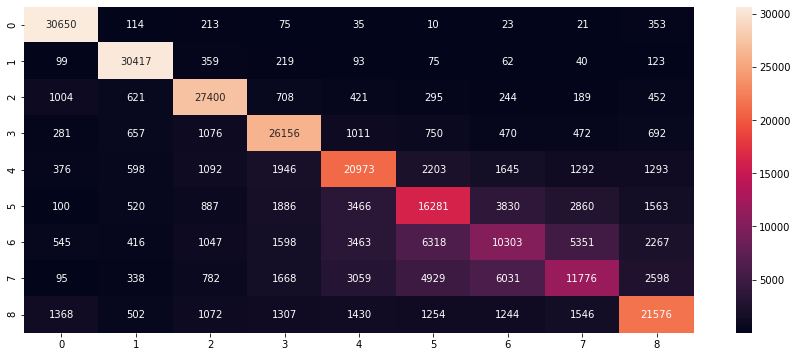

In [259]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_sm,y_pred_sm)
plt.figure(figsize=(15,6))
sns.heatmap(cm,annot=True,fmt='.10g')

## Saving Model to disk

In [272]:
import pickle
pickle.dump(classifier_sm,open('sm_model.pkl','wb'))